## Black Scholes Options Calculation 
### Parameters 
- Volatility
- Stock Price (SO)
- Strike Price (K)
- Time to Expiry (T)
- Interest Rates (Risk Free)
- Min Spot Price
- Max Spot Price
### Input
### Output 
- Heat Map
  - Call Value
  - Put Value

### Other
- impliment arbitrage oppertunity through certain parameter manipulation.
- Purchase Price Parameter for Profit and Loss heat map
- 

In [8]:
from scipy.stats import norm
import numpy as np
def Call_OptionPrice(S, K, T, sigma, r):
    # Inputs
    # C: Call Price
    # S: Current Price of Underlying
    # T: Time Until Expiration (years)
    # sigma: Volatility Anuallualized 
    # r: Risk Free ROR
    # e: Eulers Number
    # N(.): PDF
    # K: Strike Price
    # Output: Call Option Price
    d1 = (np.log(S/K) + (r + 0.5 * sigma **2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    C = S  * norm.cdf(d1) - K * np.exp(-r *T) * norm.cdf(d2)

    return C

def Put_OptionPrice(S, K, T, sigma, r):
    # Inputs
    # P: Put Price
    # S: Current Price of Underlying
    # T: Time Until Expiration (years)
    # sigma: Volatility Anuallualized 
    # r: Risk Free ROR
    # e: Eulers Number
    # N(.): PDF
    # K: Strike Price
    # Output: Call Option Price
    d1 = (np.log(S/K) + (r + 0.5 * sigma **2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    P = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return P
    
    
    
                     

In [22]:
if __name__ == "__main__":
    S_example = 100.0   # Current underlying price
    K_example = 150.0   # Strike price
    T_example = 1.0    # 1 year to expiration
    sigma_example = 0.2 # 20% annual volatility
    r_example = 0.05    # 5% risk-free interest rate

    C = Call_OptionPrice(S_example, K_example, T_example, sigma_example, r_example)
    P = Put_OptionPrice(S_example, K_example, T_example, sigma_example, r_example)
    print(f"Black–Scholes call option price: {C:.4f}")
    print(f"Black–Scholes Put option price: {P:.4f}")
    

Black–Scholes call option price: 0.3596
Black–Scholes Put option price: 43.0440


In [95]:
Min_Spot_Price = 100
Max_Spot_Price = 200
steps = 6
intervals = (Max_Spot_Price - Min_Spot_Price) / steps
spot_prices = [Min_Spot_Price + i * intervals for i in range(steps + 1)]
interest_rates = np.linspace(0.00, 0.05, 6)




    


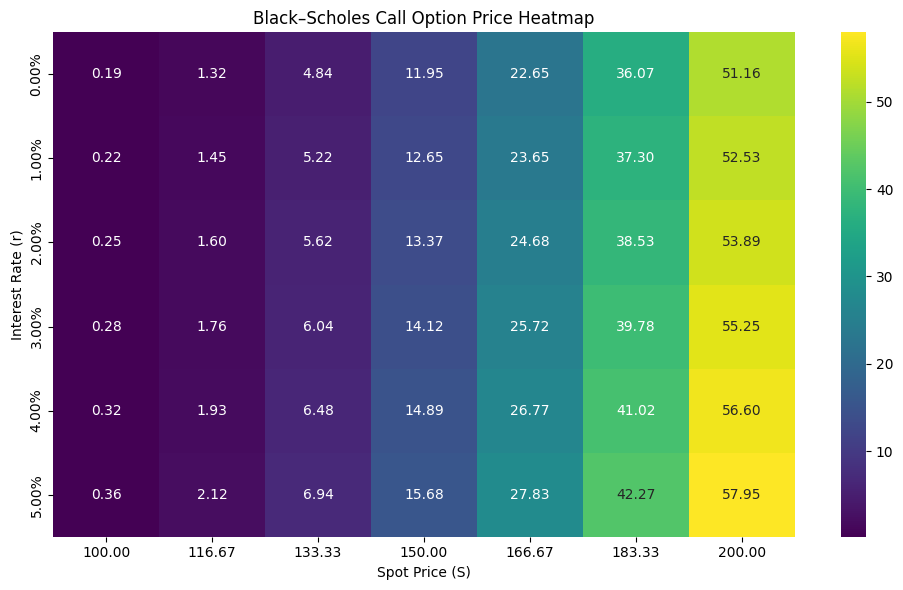

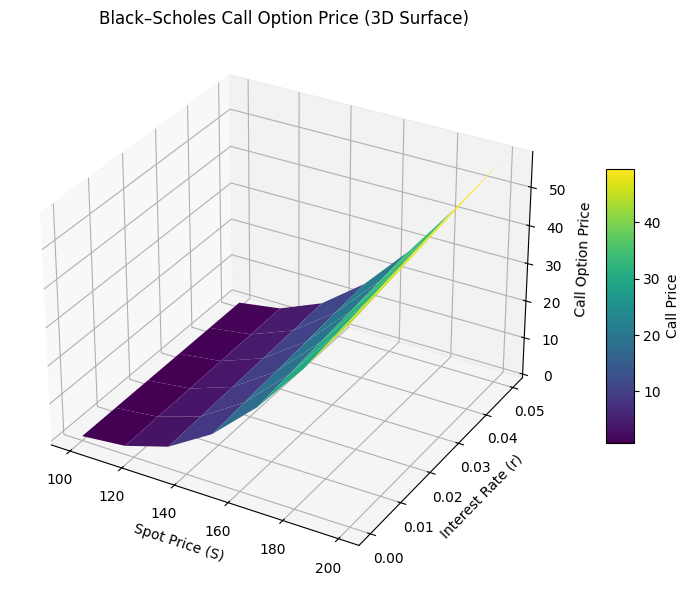

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import log, sqrt, exp
from scipy.stats import norm

# -----------------------------
# 1) Black–Scholes Call Option
# -----------------------------
def bs_call_price(S, K, T, sigma, r):
    """
    Calculate the Black–Scholes price for a European call option.
    
    Parameters:
    -----------
    S     : float
        Spot price of the underlying
    K     : float
        Strike price
    T     : float
        Time to maturity (in years)
    sigma : float
        Annualized volatility
    r     : float
        Annualized risk-free interest rate
    
    Returns:
    --------
    float
        Black–Scholes call price
    """
    if T <= 0 or sigma <= 0:
        # Degenerate case: If T=0, option value is max(S-K, 0).
        # If sigma=0, it behaves like a forward. 
        return max(S - K, 0.0)
    
    d1 = (log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    
    call_val = S * norm.cdf(d1) - K * exp(-r * T) * norm.cdf(d2)
    return call_val

# -----------------------------
# 2) Define Ranges
# -----------------------------
Min_Spot_Price = 100
Max_Spot_Price = 200
steps = 6

# We'll define an interval based on the user's formula
intervals = (Max_Spot_Price - Min_Spot_Price) / steps
# Create an array of spot prices (7 points if steps=6)
spot_prices = [Min_Spot_Price + i * intervals for i in range(steps + 1)]

# Define interest rates from 0% up to 5% in increments of 1% (total of 6 points)
interest_rates = np.linspace(0.00, 0.05, 6)

# Fixed option parameters
K = 150.0          # Strike Price
T = 1.0            # 1 year to expiration
sigma = 0.2        # 20% annualized volatility

# -----------------------------
# 3) Create a 2D Price Matrix
# -----------------------------
# Rows = different interest rates
# Columns = different spot prices
call_matrix = np.zeros((len(interest_rates), len(spot_prices)))

for i, r in enumerate(interest_rates):
    for j, S in enumerate(spot_prices):
        call_matrix[i, j] = bs_call_price(S, K, T, sigma, r)

# -----------------------------
# 4) Plot the Heatmap
# -----------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(
    call_matrix, 
    annot=True,        # Show numeric values in each cell
    fmt=".2f",         # Format to 2 decimal places
    cmap="viridis",
    xticklabels=[f"{s:.2f}" for s in spot_prices],
    yticklabels=[f"{100*r:.2f}%" for r in interest_rates]
)

plt.title("Black–Scholes Call Option Price Heatmap")
plt.xlabel("Spot Price (S)")
plt.ylabel("Interest Rate (r)")
plt.tight_layout()
plt.show()

X, Y = np.meshgrid(spot_prices, interest_rates)

# Z is the matrix of call prices
Z = call_matrix

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=10, label="Call Price")

# Label axes
ax.set_title("Black–Scholes Call Option Price (3D Surface)")
ax.set_xlabel("Spot Price (S)")
ax.set_ylabel("Interest Rate (r)")
ax.set_zlabel("Call Option Price")

plt.tight_layout()
plt.show()


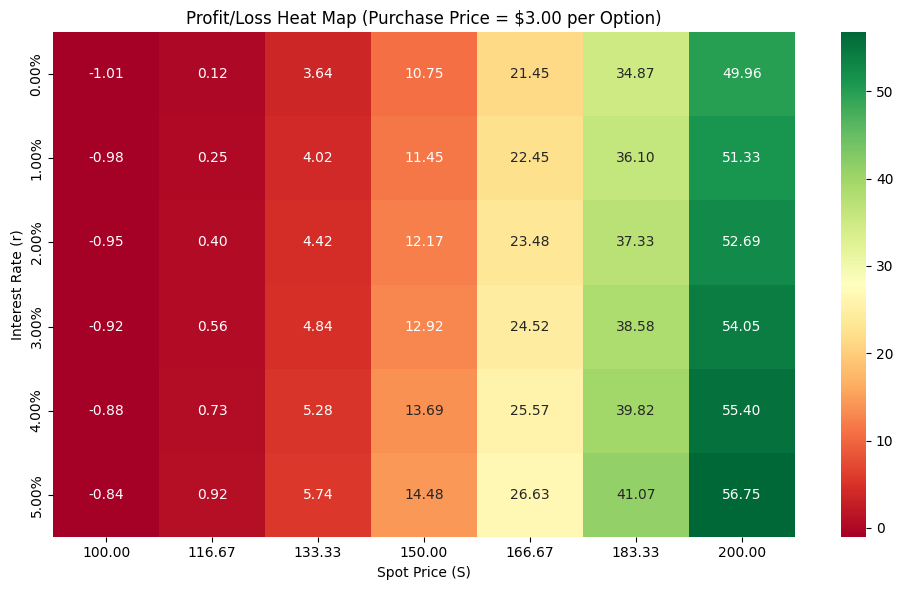

In [27]:
# Purchase profit loss Heat Map

call_matrix = call_matrix
purchase_price = 1.20 # purchase price per option.

pnl_matrix = call_matrix - purchase_price

plt.figure(figsize=(10, 6))

sns.heatmap(
    pnl_matrix,
    annot=True,           # show numeric values
    fmt=".2f",            # format to 2 decimals
    cmap="RdYlGn",        # red->yellow->green color scheme for negative->positive
    xticklabels=[f"{s:.2f}" for s in spot_prices],
    yticklabels=[f"{r*100:.2f}%" for r in interest_rates]
)

plt.title("Profit/Loss Heat Map (Purchase Price = $3.00 per Option)")
plt.xlabel("Spot Price (S)")
plt.ylabel("Interest Rate (r)")
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed


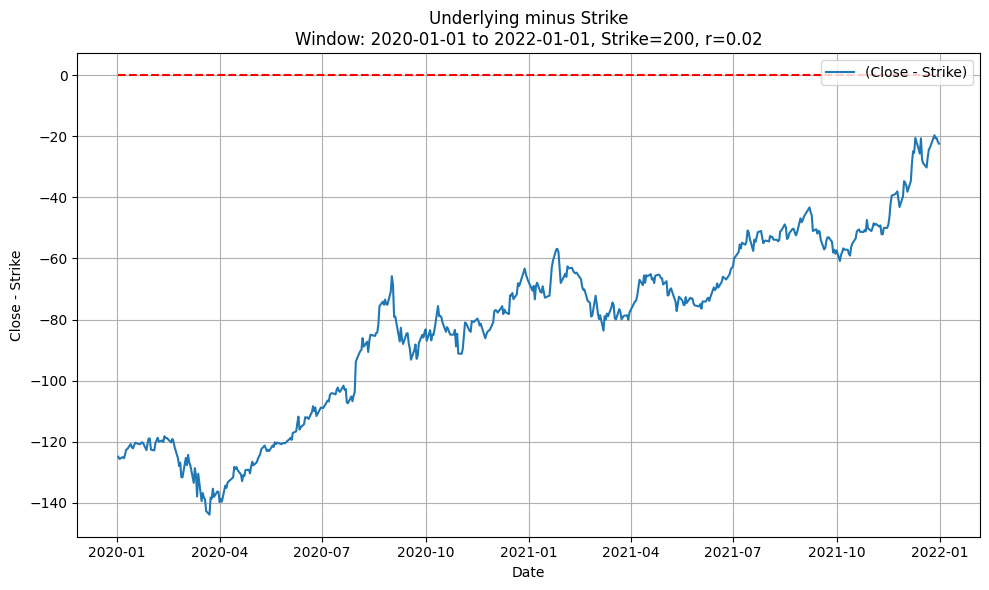

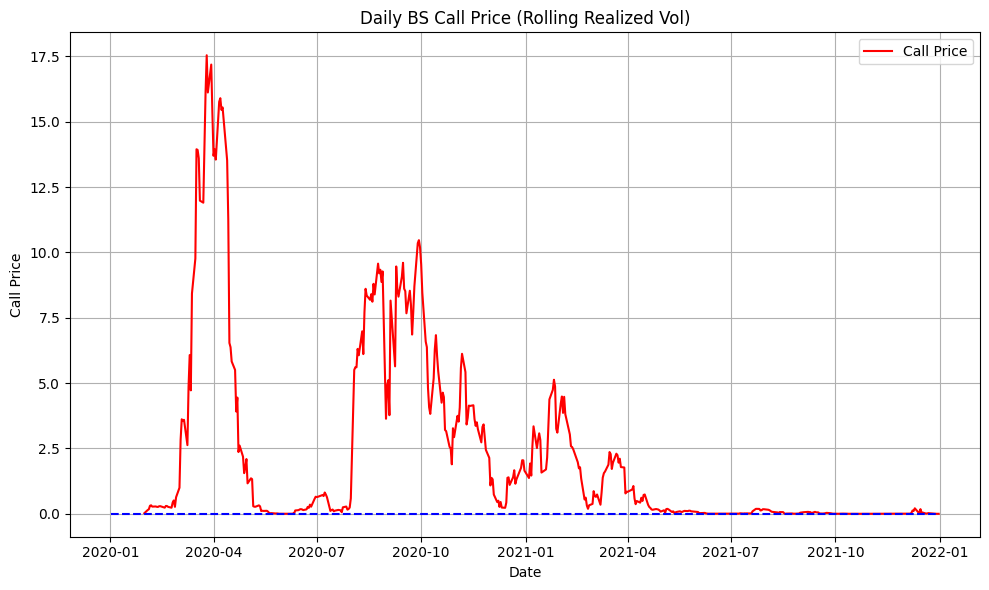

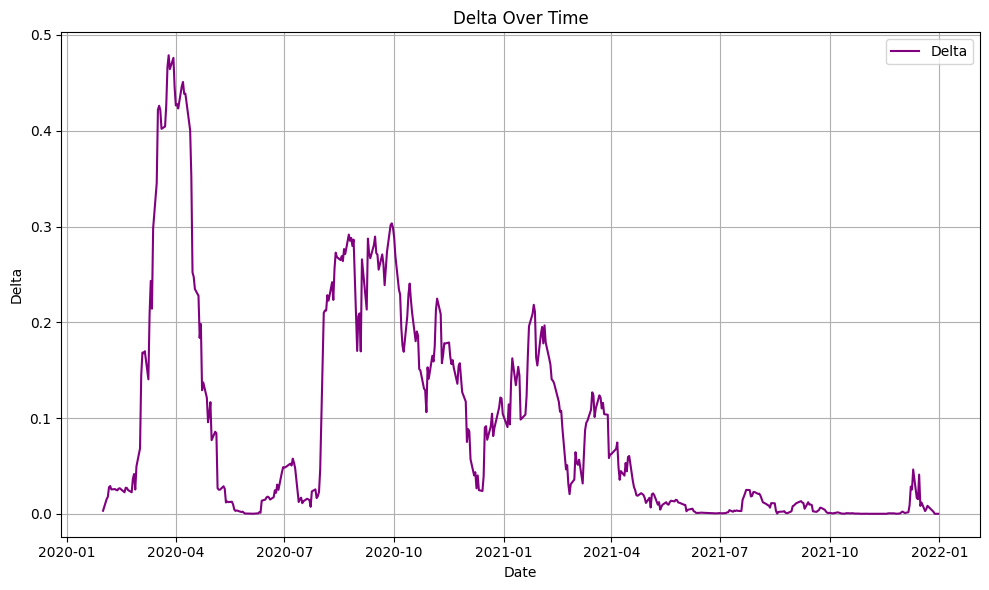

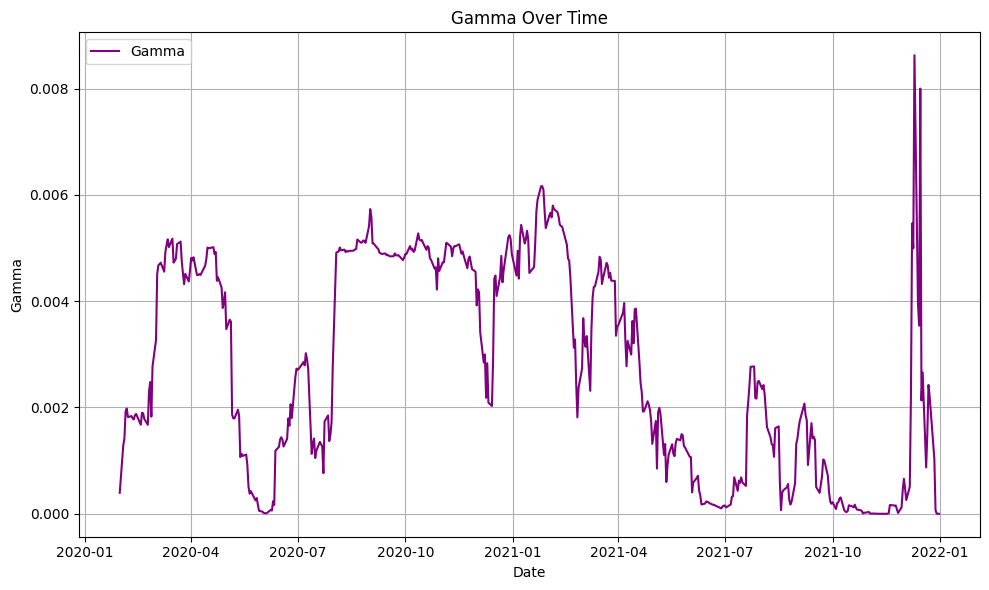

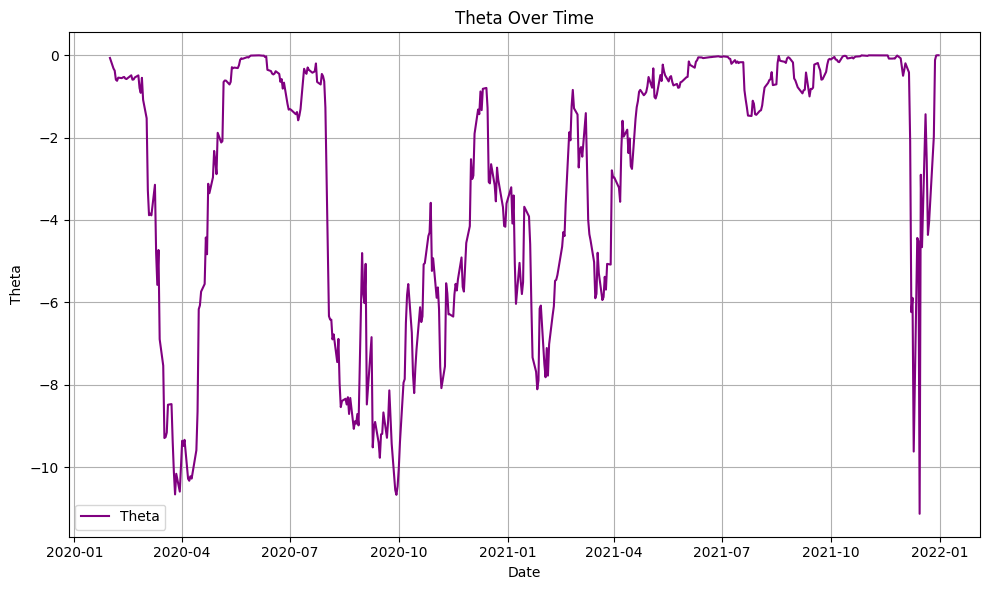

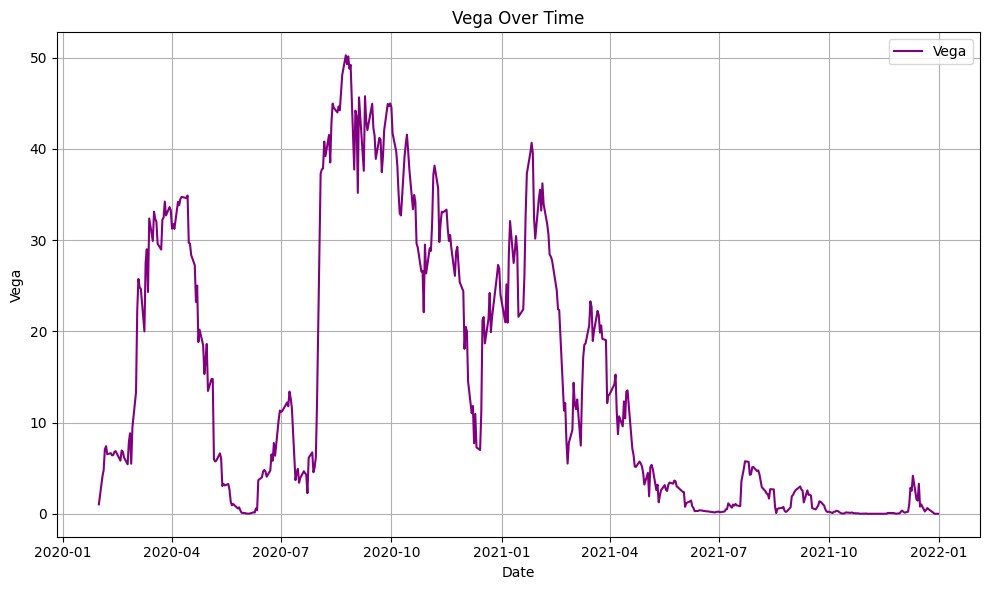

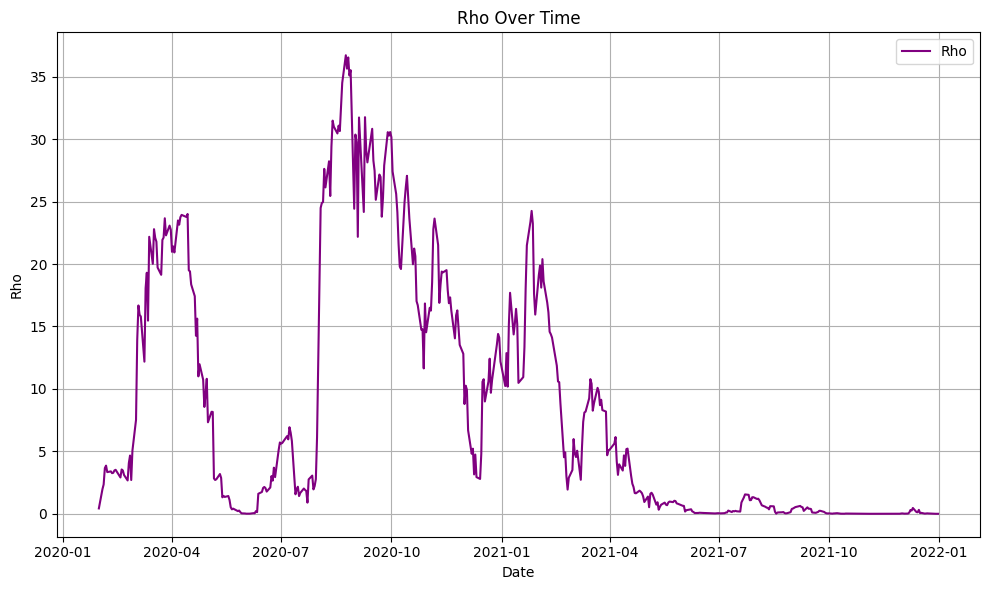

In [89]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from math import log, sqrt, exp
from scipy.stats import norm
import pandas as pd

def bs_call_price(S, K, T, sigma, r):
    """
    Black–Scholes formula for a European call option.
    
    Parameters:
    -----------
    S : float   - current spot price
    K : float   - strike price
    T : float   - time to maturity (in years)
    sigma : float - annualized volatility
    r : float   - annualized risk-free interest rate
    
    Returns:
    --------
    float - theoretical call option price
    """
    # If no time or no volatility, fallback to intrinsic value
    if T <= 0:
        return max(S - K, 0.0)
    if sigma <= 0:
        return max(S - K, 0.0)
    
    d1 = (log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    call_val = S * norm.cdf(d1) - K * exp(-r * T) * norm.cdf(d2)
    return call_val

def bs_call_greeks(S, K, T, sigma, r):
    """
    Compute Greeks for a European call option under the Black–Scholes model.

    Returns a dict with keys: delta, gamma, theta, vega, rho
    """
    if T <= 0 or sigma <= 0:
        # Greeks degenerate if no time or no volatility (option purely intrinsic)
        return {"delta": 0, "gamma": 0, "theta": 0, "vega": 0, "rho": 0}
    
    d1 = (log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    
    pdf_d1 = 1.0 / sqrt(2.0 * np.pi) * np.exp(-0.5 * d1**2)  # n(d1)
    cdf_d1 = norm.cdf(d1)
    cdf_d2 = norm.cdf(d2)
    
    # Delta
    delta = cdf_d1
    
    # Gamma
    gamma = pdf_d1 / (S * sigma * sqrt(T))
    
    # Theta (annualized); note: often there's a negative sign to indicate decay
    # Standard formula (per year):
    theta = ( - (S * pdf_d1 * sigma) / (2 * sqrt(T))
              - r * K * np.exp(-r * T) * cdf_d2 )
    
    # Vega
    vega = S * sqrt(T) * pdf_d1
    
    # Rho
    rho = K * T * np.exp(-r * T) * cdf_d2
    
    return {
        "delta": delta,
        "gamma": gamma,
        "theta": theta,
        "vega": vega,
        "rho": rho
    }

def plot_call_price_with_rolling_vol_and_greeks(
    data: pd.DataFrame,
    start_date,
    end_date,
    strike_price=150.0,
    rolling_window=20,
    r=0.02
):
    """
    1) Compute a rolling realized vol as a stand-in for implied vol.
    2) Price a call daily under BS and store the Greeks (Delta, Gamma, Theta, Vega, Rho).
    3) Plot:
        - (Close - Strike) vs. horizontal line 0
        - CallPrice vs. horizontal line 0
        - Each Greek on its own figure
    """
    # --------------------------
    # 1) Slice data & prep
    # --------------------------
    data_slice = data.loc[start_date:end_date].copy()
    
    if len(data_slice) < rolling_window:
        print("Not enough data to compute rolling vol for the chosen window.")
        return
    
    data_slice["Returns"] = data_slice["Close"].pct_change()
    data_slice["sigma"]   = np.nan
    data_slice["CallPrice"] = np.nan
    # Greeks:
    data_slice["Delta"] = np.nan
    data_slice["Gamma"] = np.nan
    data_slice["Theta"] = np.nan
    data_slice["Vega"]  = np.nan
    data_slice["Rho"]   = np.nan
    
    expiration_date = data_slice.index[-1]
    
    # --------------------------
    # 2) Loop & compute
    # --------------------------
    for i in range(len(data_slice)):
        if i < rolling_window:
            continue  # Not enough data for rolling window
        
        # Current date & time to maturity
        idx = data_slice.index[i]
        day_spread = (expiration_date - idx).days  # simpler: using .days
        T = day_spread / 365.0
        
        # Rolling realized volatility
        recent_returns = data_slice["Returns"].iloc[i-rolling_window : i].dropna()
        daily_std = recent_returns.std()
        sigma = daily_std * np.sqrt(252)  # annualize
        data_slice.loc[idx, "sigma"] = sigma
        
        # If sigma is valid & S>0 => compute call price & greeks
        if sigma > 0:
            S = data_slice["Close"].iloc[i]
            if S <= 0:
                continue
            
            # Black–Scholes call
            c_price = bs_call_price(S, strike_price, T, sigma, r)
            data_slice.loc[idx, "CallPrice"] = c_price
            
            # Greeks
            greeks = bs_call_greeks(S, strike_price, T, sigma, r)
            data_slice.loc[idx, "Delta"] = greeks["delta"]
            data_slice.loc[idx, "Gamma"] = greeks["gamma"]
            data_slice.loc[idx, "Theta"] = greeks["theta"]
            data_slice.loc[idx, "Vega"]  = greeks["vega"]
            data_slice.loc[idx, "Rho"]   = greeks["rho"]
    
    # --------------------------
    # 3) Plot #1: (Close - Strike)
    # --------------------------
    plt.figure(figsize=(10,6))
    plt.plot(data_slice.index, data_slice["Close"] - strike_price, label="(Close - Strike)")
    plt.title(f"Underlying minus Strike\nWindow: {start_date} to {end_date}, Strike={strike_price}, r={r}")
    plt.hlines(y=0,
               xmin=data_slice.index[0],
               xmax=data_slice.index[-1],
               linestyles='dashed',
               color='red')
    plt.xlabel("Date")
    plt.ylabel("Close - Strike")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # --------------------------
    # 4) Plot #2: Call Price
    # --------------------------
    plt.figure(figsize=(10,6))
    plt.plot(data_slice.index, data_slice["CallPrice"], label="Call Price", color="red")
    plt.hlines(y=0,
               xmin=data_slice.index[0],
               xmax=data_slice.index[-1],
               linestyles='dashed',
               color='blue')
    plt.title("Daily BS Call Price (Rolling Realized Vol)")
    plt.xlabel("Date")
    plt.ylabel("Call Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --------------------------
    # 5) Plot #3: The Greeks
    #    We'll do them each on its own figure
    # --------------------------
    for greek_name in ["Delta", "Gamma", "Theta", "Vega", "Rho"]:
        plt.figure(figsize=(10,6))
        plt.plot(data_slice.index, data_slice[greek_name], label=greek_name, color="purple")
        plt.title(f"{greek_name} Over Time")
        plt.xlabel("Date")
        plt.ylabel(greek_name)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    # (Optional) Return the slice with all columns, if you'd like to inspect
    return data_slice

# -------------------------------------------------------------
# Example usage:
if __name__ == "__main__":
    # Download sample data
    ticker_symbol = "AAPL"
    df = yf.download("AAPL", start="2020-01-01", end="2025-01-01")

    plot_call_price_with_rolling_vol_and_greeks(
        data=df,
        start_date="2020-01-01",
        end_date="2022-01-01",
        strike_price=200,
        rolling_window=20,
        r=0.02
    )
    


[*********************100%%**********************]  1 of 1 completed


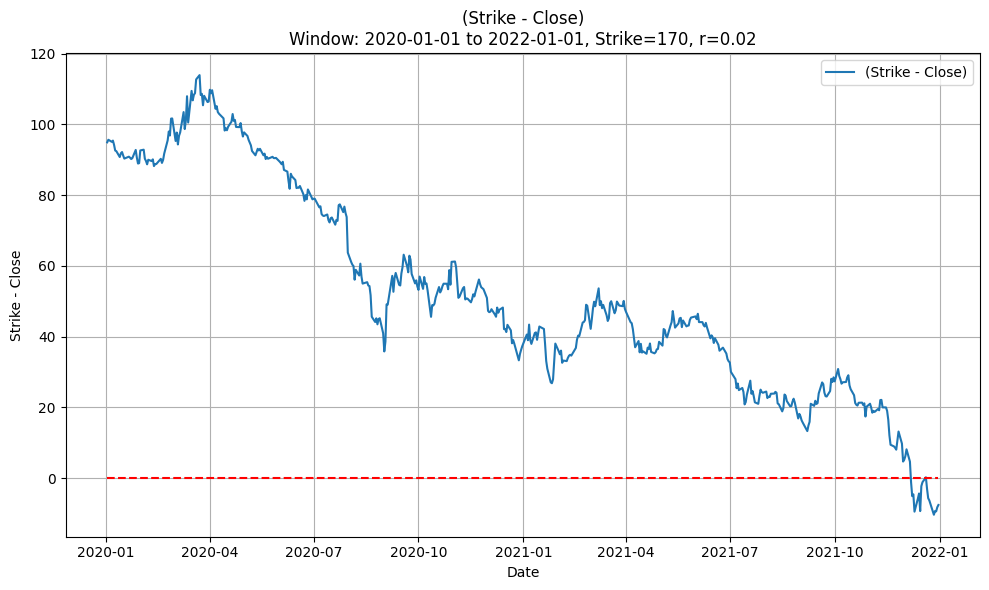

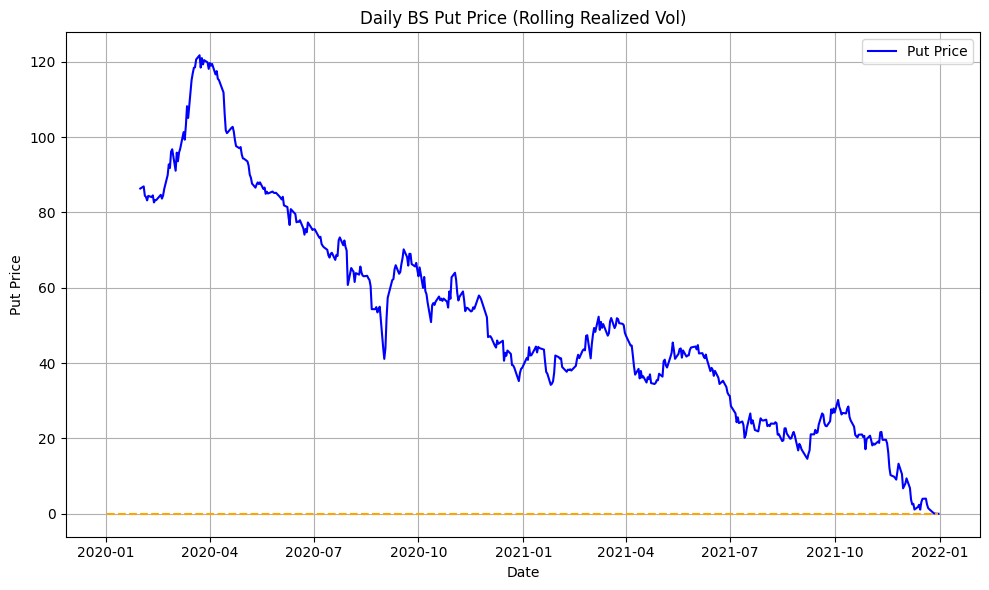

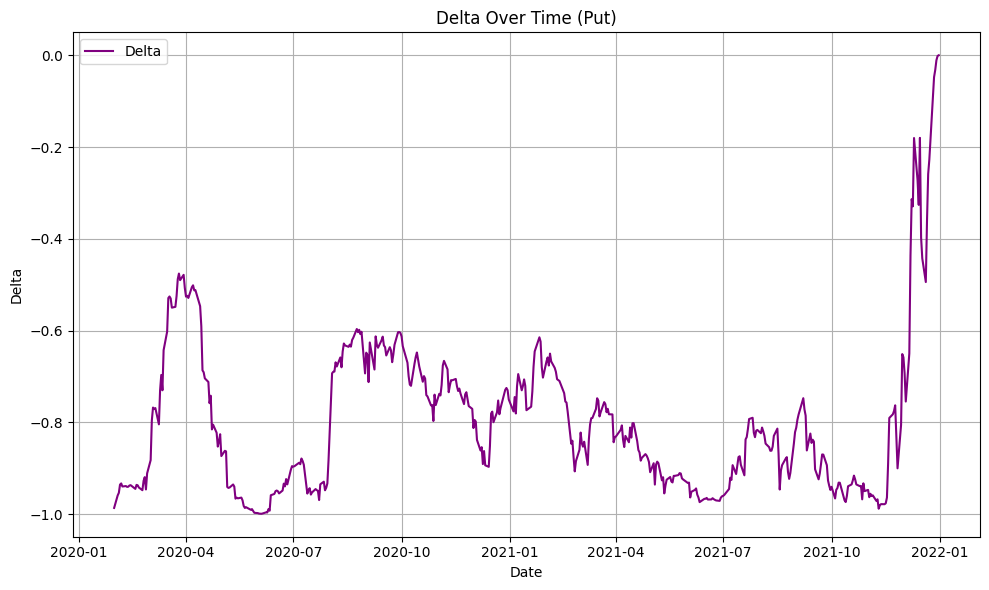

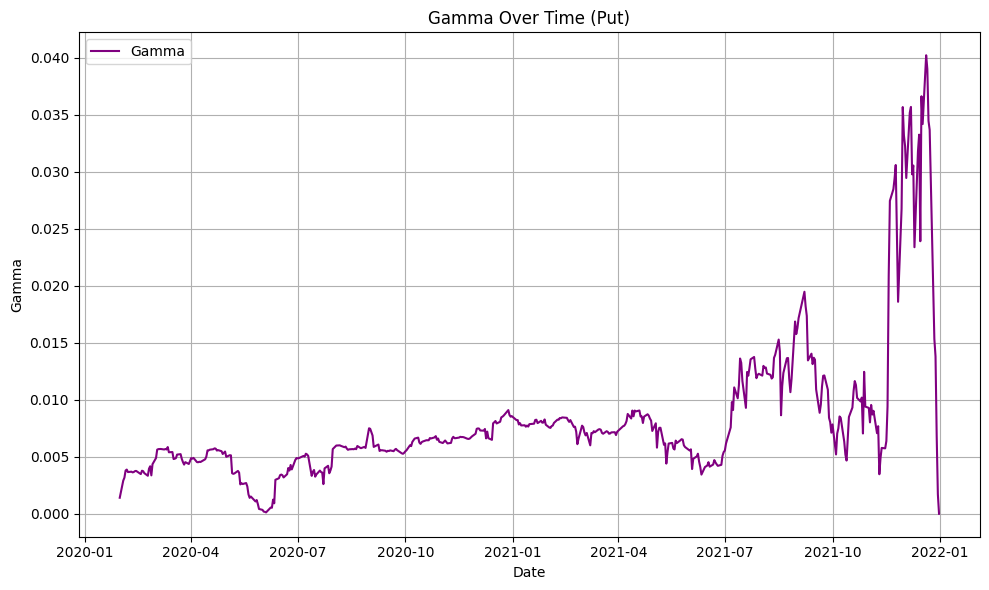

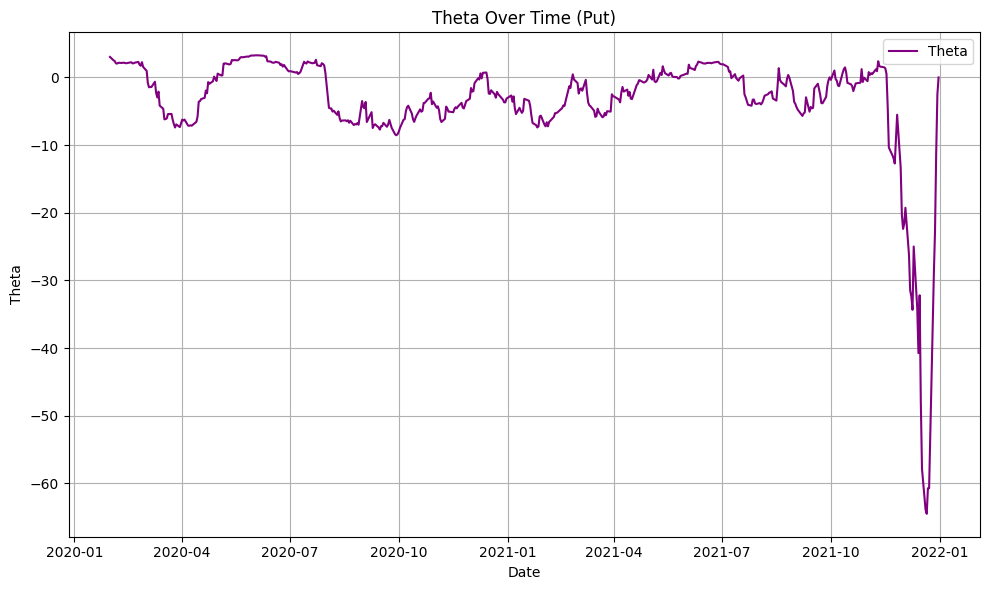

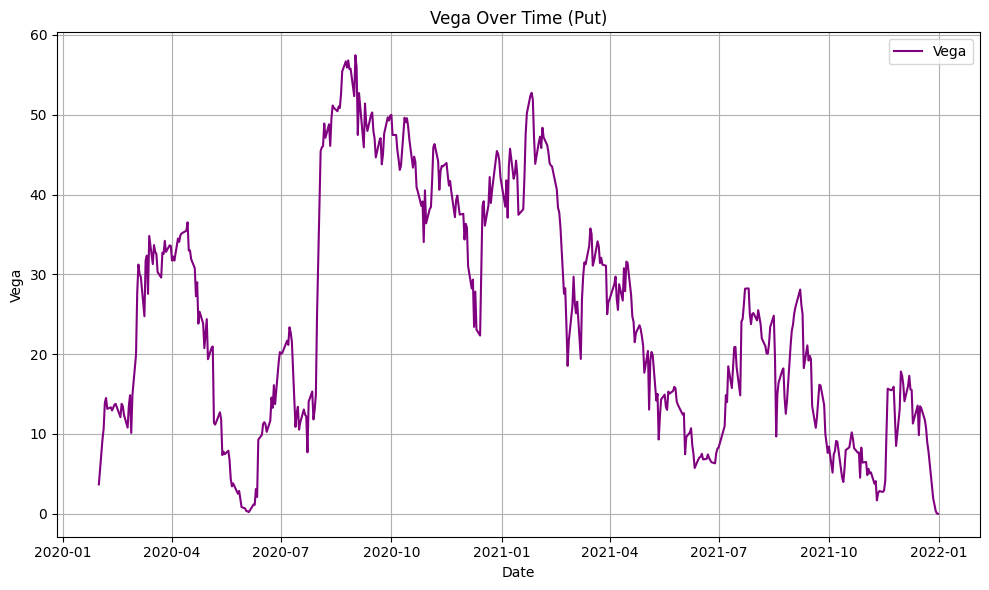

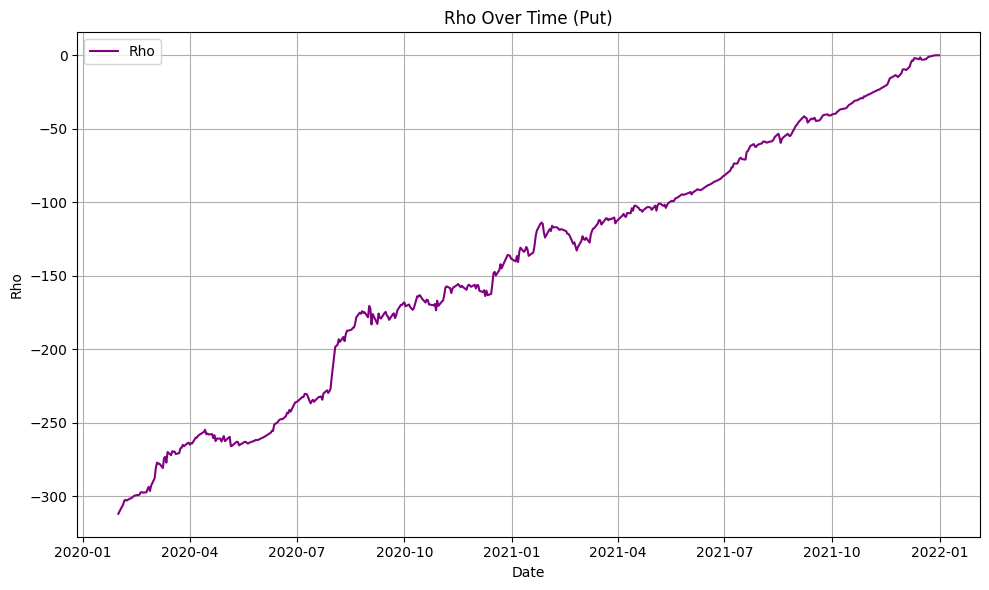

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from math import log, sqrt, exp
from scipy.stats import norm

def bs_put_price(S, K, T, sigma, r):
    """
    Black–Scholes formula for a European put option (long position).
    
    Parameters:
    -----------
    S : float       - current spot price
    K : float       - strike price
    T : float       - time to maturity (in years)
    sigma : float   - annualized volatility
    r : float       - annualized risk-free interest rate
    
    Returns:
    --------
    float - theoretical put option price
    """
    if T <= 0 or sigma <= 0 or S <= 0:
        # Degenerate: fallback to intrinsic
        return max(K - S, 0.0)
    
    d1 = (log(S/K) + (r + 0.5 * sigma**2)*T) / (sigma * sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    
    # Long put:
    put_val = K*exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)
    return put_val

def bs_put_greeks(S, K, T, sigma, r):
    """
    Compute Greeks for a European put option (long) under the Black–Scholes model.
    
    Returns a dict with keys: delta, gamma, theta, vega, rho
    """
    if T <= 0 or sigma <= 0 or S <= 0:
        return {"delta": 0, "gamma": 0, "theta": 0, "vega": 0, "rho": 0}
    
    d1 = (log(S/K) + (r + 0.5*sigma**2)*T) / (sigma * sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    
    pdf_d1 = (1.0 / sqrt(2*np.pi)) * np.exp(-0.5 * d1**2)
    
    # Delta (long put)
    # = Phi(d1) - 1  =>  or  = -Phi(-d1)
    delta = norm.cdf(d1) - 1
    
    # Gamma (same for calls/puts)
    gamma = pdf_d1 / (S * sigma * sqrt(T))
    
    # Theta (annualized)
    # For put:  - (S * sigma * n(d1)) / (2 sqrt(T)) + r*K e^{-rT} Phi(-d2)
    theta = (
        - (S * pdf_d1 * sigma) / (2 * sqrt(T))
        + r * K * exp(-r*T) * norm.cdf(-d2)
    )
    
    # Vega (same for calls/puts)
    vega = S * sqrt(T) * pdf_d1
    
    # Rho (put)
    # = -K T e^{-rT} Phi(-d2)
    rho = -K * T * exp(-r*T) * norm.cdf(-d2)
    
    return {
        "delta": delta,
        "gamma": gamma,
        "theta": theta,
        "vega": vega,
        "rho": rho
    }

def plot_put_price_with_rolling_vol_and_greeks(
    data: pd.DataFrame,
    start_date,
    end_date,
    strike_price=150.0,
    rolling_window=20,
    r=0.02
):
    """
    1) Compute a rolling realized vol as a stand-in for implied vol.
    2) Price a long put daily under BS and store its Greeks (Delta, Gamma, Theta, Vega, Rho).
    3) Plot:
       - (Strike - Close) vs. horizontal line at 0  (to see if S<K)
       - PutPrice vs. horizontal line at 0
       - Each Greek on its own figure
    """
    # Slice data & ensure we have enough rows
    data_slice = data.loc[start_date:end_date].copy()
    if len(data_slice) < rolling_window:
        print("Not enough data to compute rolling vol for the chosen window.")
        return
    
    # Prepare columns
    data_slice["Returns"]   = data_slice["Close"].pct_change()
    data_slice["sigma"]     = np.nan
    data_slice["PutPrice"]  = np.nan
    # Greeks
    data_slice["Delta"] = np.nan
    data_slice["Gamma"] = np.nan
    data_slice["Theta"] = np.nan
    data_slice["Vega"]  = np.nan
    data_slice["Rho"]   = np.nan
    
    # We'll treat the last date in the slice as 'expiration'
    expiration_date = data_slice.index[-1]
    
    # Compute daily T, rolling vol, put price & Greeks
    for i in range(len(data_slice)):
        if i < rolling_window:
            continue
        
        idx = data_slice.index[i]
        
        # Time to maturity (in years)
        day_spread = (expiration_date - idx).days
        T = day_spread / 365.0
        
        # Rolling realized volatility
        recent_returns = data_slice["Returns"].iloc[i-rolling_window : i].dropna()
        daily_std = recent_returns.std()
        sigma = daily_std * np.sqrt(252)
        data_slice.loc[idx, "sigma"] = sigma
        
        # Compute put price & greeks if sigma > 0
        S = data_slice["Close"].iloc[i]
        if sigma > 0 and S > 0:
            put_val  = bs_put_price(S, strike_price, T, sigma, r)
            put_gk   = bs_put_greeks(S, strike_price, T, sigma, r)
            
            data_slice.loc[idx, "PutPrice"] = put_val
            data_slice.loc[idx, "Delta"]    = put_gk["delta"]
            data_slice.loc[idx, "Gamma"]    = put_gk["gamma"]
            data_slice.loc[idx, "Theta"]    = put_gk["theta"]
            data_slice.loc[idx, "Vega"]     = put_gk["vega"]
            data_slice.loc[idx, "Rho"]      = put_gk["rho"]
    
    # --------------------
    # Plot #1: (Strike - Close)
    # --------------------
    plt.figure(figsize=(10,6))
    plt.plot(data_slice.index, strike_price - data_slice["Close"], label="(Strike - Close)")
    plt.title(f"(Strike - Close)\nWindow: {start_date} to {end_date}, Strike={strike_price}, r={r}")
    plt.hlines(y=0, 
               xmin=data_slice.index[0],
               xmax=data_slice.index[-1],
               linestyles='dashed',
               color='red')
    plt.xlabel("Date")
    plt.ylabel("Strike - Close")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # --------------------
    # Plot #2: Put Price
    # --------------------
    plt.figure(figsize=(10,6))
    plt.plot(data_slice.index, data_slice["PutPrice"], label="Put Price", color="blue")
    plt.hlines(y=0,
               xmin=data_slice.index[0],
               xmax=data_slice.index[-1],
               linestyles='dashed',
               color='orange')
    plt.title("Daily BS Put Price (Rolling Realized Vol)")
    plt.xlabel("Date")
    plt.ylabel("Put Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # --------------------
    # Plot #3: The Greeks
    # --------------------
    for greek_name in ["Delta", "Gamma", "Theta", "Vega", "Rho"]:
        plt.figure(figsize=(10,6))
        plt.plot(data_slice.index, data_slice[greek_name], label=greek_name, color="purple")
        plt.title(f"{greek_name} Over Time (Put)")
        plt.xlabel("Date")
        plt.ylabel(greek_name)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    # Optionally return the DataFrame
    return data_slice


# -------------------------------------------------------------
# Example usage (uncomment to run as script):
if __name__ == "__main__":
    df = yf.download("AAPL", start="2020-01-01", end="2023-01-01")
    short_df = plot_put_price_with_rolling_vol_and_greeks(
        data=df,
        start_date="2020-01-01",
        end_date="2022-01-01",
        strike_price=170,
        rolling_window=20,
        r=0.02
    )
    
